# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Analysis

The most obvious correlation is that the closer a city is to the equator, either north or south of it. The higher the temperature tends to be. 
Cities tend to be warmer the closer to the equator they are, which is when latitude is equals to 0. Summer is coming to an end in the northern hemisphere so temperatures are balancing out with those in the southern hemisphere where the summer season is about to begin

This was the only strong relationship from the data analyzed. There were no strongs relationships between a city's latitude and it's humidity, is cloudiness and how windy it is.

However it was interesting to see that there is a lot of cities with clear skies (cloudiness = 0) as well as a big block of cities with cloudiness ~80% & ~100%.

Also understandably so, winds tend to oscillate between 0 and 15mph regardless of a city's location in the  hemisphere

In [69]:
# Dependencies
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# API Keys
from api_keys import weather_api_key
temp_units = "imperial"

from citipy import citipy

# Range of lats and longs
lat_range = (-90, 90)
lng_range = (-180, 180)

weather_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="
weather_url

'http://api.openweathermap.org/data/2.5/weather?appid=17cfff41535eb07c50898cabd10d0b3e&units=imperial&q='

## Generate Cities List

In [3]:
# Empty list to hold city data
coordinates = []
city_list = []

# Pick cities by creating set of random lat and long
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size=1500)
coordinates = zip(lats,lngs)

#Find cities closest to lat,lng combination
for x in coordinates:
    city = citipy.nearest_city(x[0], x[1]).city_name
    if city not in city_list:
        city_list.append(city)
len(city_list)



611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_fordf =[]
lats_fordf =[]
lngs_fordf = []
max_temp = []
humidity =[]
cloudiness = []
wind_speed = []
country = []
date =[]

# set counts for organization

counts = 0
sets = 1

# loops for creating df

for city in city_list:
    try:
        response = requests.get(weather_url + city.replace(" ", "&")).json()
        lats_fordf.append(response["coord"]["lat"])
        lngs_fordf.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        if counts > 49:
            counts = 1
            sets += 1
            city_fordf.append(city)
        else:
            counts += 1
            city_fordf.append(city)
        print(f"Processing Record {counts} of {sets} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")
        

Processing Record 1 of 1 | kruisfontein
Processing Record 2 of 1 | lorengau
Processing Record 3 of 1 | hermanus
Processing Record 4 of 1 | pingyin
Processing Record 5 of 1 | nishihara
Processing Record 6 of 1 | asyut
Processing Record 7 of 1 | victoria
Processing Record 8 of 1 | bambous virieux
Processing Record 9 of 1 | ostrovnoy
City not found. Skipping...
Processing Record 10 of 1 | busselton
Processing Record 11 of 1 | jamestown
Processing Record 12 of 1 | hilo
City not found. Skipping...
Processing Record 13 of 1 | manakara
Processing Record 14 of 1 | ribeira grande
Processing Record 15 of 1 | cabedelo
Processing Record 16 of 1 | kavieng
Processing Record 17 of 1 | carnarvon
Processing Record 18 of 1 | ushuaia
Processing Record 19 of 1 | yanliang
Processing Record 20 of 1 | acapulco
Processing Record 21 of 1 | nioro
Processing Record 22 of 1 | albany
Processing Record 23 of 1 | chiredzi
Processing Record 24 of 1 | rikitea
Processing Record 25 of 1 | new norfolk
Processing Record 2

Processing Record 1 of 5 | cabo san lucas
Processing Record 2 of 5 | naruto
Processing Record 3 of 5 | namikupa
Processing Record 4 of 5 | lages
Processing Record 5 of 5 | port blair
Processing Record 6 of 5 | vestmannaeyjar
Processing Record 7 of 5 | arraial do cabo
Processing Record 8 of 5 | saint-philippe
Processing Record 9 of 5 | oriximina
Processing Record 10 of 5 | chhatapur
Processing Record 11 of 5 | kandrian
Processing Record 12 of 5 | ocos
Processing Record 13 of 5 | fort nelson
Processing Record 14 of 5 | naberera
Processing Record 15 of 5 | severo-yeniseyskiy
Processing Record 16 of 5 | cayenne
City not found. Skipping...
Processing Record 17 of 5 | kilindoni
Processing Record 18 of 5 | clyde river
Processing Record 19 of 5 | manado
Processing Record 20 of 5 | padang
Processing Record 21 of 5 | olafsvik
Processing Record 22 of 5 | chuy
Processing Record 23 of 5 | tuktoyaktuk
Processing Record 24 of 5 | geraldton
Processing Record 25 of 5 | preobrazheniye
Processing Record 

Processing Record 10 of 9 | pokrovsk
Processing Record 11 of 9 | englewood
Processing Record 12 of 9 | ironton
Processing Record 13 of 9 | ekibastuz
Processing Record 14 of 9 | angoche
Processing Record 15 of 9 | valleyview
Processing Record 16 of 9 | arrecife
Processing Record 17 of 9 | presidente medici
Processing Record 18 of 9 | galveston
Processing Record 19 of 9 | araouane
Processing Record 20 of 9 | boa vista
Processing Record 21 of 9 | kiama
Processing Record 22 of 9 | erdenet
Processing Record 23 of 9 | sapa
Processing Record 24 of 9 | soe
Processing Record 25 of 9 | vao
Processing Record 26 of 9 | brandon
Processing Record 27 of 9 | gazanjyk
Processing Record 28 of 9 | emerald
Processing Record 29 of 9 | brasilia de minas
Processing Record 30 of 9 | bandarbeyla
Processing Record 31 of 9 | brainerd
Processing Record 32 of 9 | amga
Processing Record 33 of 9 | port macquarie
City not found. Skipping...
Processing Record 34 of 9 | akyab
Processing Record 35 of 9 | camacha
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
weather_dict = {
    "City": city_fordf,
    "Lat": lats_fordf,
    "Lng": lngs_fordf,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
    
}

In [10]:
#Create DatsFrame
weather_df = pd.DataFrame(weather_dict)
weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kruisfontein,-34.00,24.73,54.30,61,0,8.37,ZA,1600026114
1,lorengau,-2.02,147.27,81.93,81,100,11.65,PG,1600026115
2,hermanus,-34.42,19.23,55.00,78,35,8.99,ZA,1600026115
3,pingyin,36.28,116.45,75.00,69,100,6.29,CN,1600026115
4,nishihara,26.18,127.76,82.40,94,40,3.36,JP,1600026116


In [11]:
weather_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [12]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,21.488318,20.965570,68.187776,69.132007,49.486438,7.502116,1.600026e+09
std,31.787228,85.993629,15.163999,22.672981,40.622024,4.914727,9.528677e+01
min,-54.800000,-175.200000,23.320000,2.000000,0.000000,0.220000,1.600026e+09
25%,-6.220000,-50.330000,57.070000,55.000000,1.000000,3.440000,1.600026e+09
50%,26.180000,25.100000,71.600000,75.000000,48.000000,6.710000,1.600026e+09
75%,47.430000,99.830000,79.020000,87.000000,90.000000,10.290000,1.600026e+09
max,78.220000,179.320000,106.920000,100.000000,100.000000,24.160000,1.600026e+09


In [19]:
output = os.path.join("..","output_data","Cities.csv")
weather_df.to_csv(output)



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

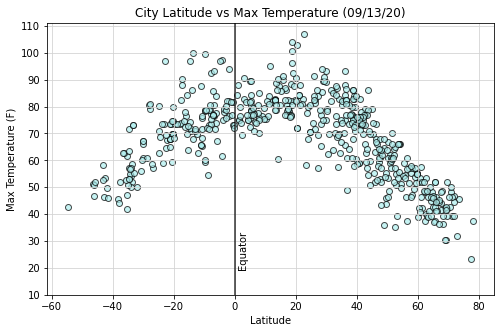

In [59]:
plt.figure(figsize = (8,5))
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], edgecolors="black", facecolors="paleturquoise", alpha=0.7)
plt.title("City Latitude vs Max Temperature (09/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.axvline(0, color="black", alpha=0.8)
plt.text(1,20,"Equator", rotation=90)
plt.grid(color="lightgrey")
plt.yticks(np.arange(10, max(weather_df["Max Temp"])*1.05, 10))
plt.savefig(os.path.join("..","output_data","lat_maxtemp.png"))


Using a scatter plot to visualize the relationship between the max temperature (how how a city can be) vs it's proximity to the equator. The closer to the equator, the hotter the cities can be

## Latitude vs. Humidity Plot

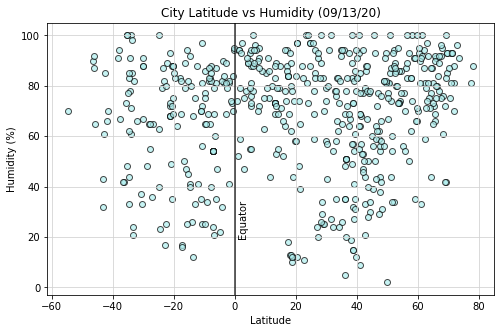

In [88]:
plt.figure(figsize = (8,5))
plt.scatter(weather_df["Lat"],weather_df["Humidity"], edgecolors="black", facecolors="paleturquoise", alpha=0.7)
plt.title("City Latitude vs Humidity (09/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.axvline(0, color="black", alpha=0.8)
plt.text(1,20,"Equator", rotation=90)
plt.grid(color="lightgrey")
plt.savefig(os.path.join("..","output_data","lat_hum.png"))

Using a scatter plot to see if there is a relationship to be found between a city's proximity to the equator and how humid the city is. There is no apparent relationship, but a lot of the cities from the random sample of 500+ cities, seem to have a high % of humidity

## Latitude vs. Cloudiness Plot

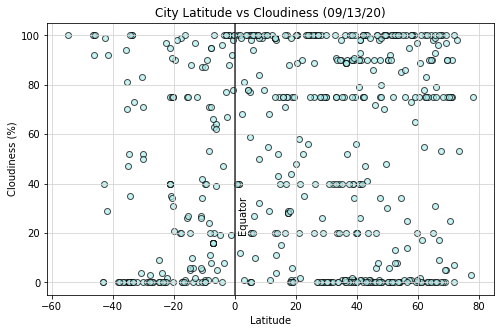

In [87]:
plt.figure(figsize = (8,5))
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], edgecolors="black", facecolors="paleturquoise", alpha=0.7)
plt.title("City Latitude vs Cloudiness (09/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.axvline(0, color="black", alpha=0.8)
plt.text(1,20,"Equator", rotation=90)
plt.grid(color="lightgrey")
plt.savefig(os.path.join("..","output_data","lat_cloud.png"))

Using a scatter plot to see if there is a relationship between a city's proximity to the equator and how cloudy the city gets. There is no obvious relationship there

## Latitude vs. Wind Speed Plot

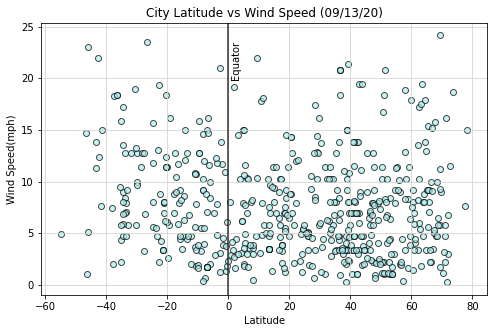

In [62]:
plt.figure(figsize = (8,5))
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], edgecolors="black", facecolors="paleturquoise", alpha=0.7)
plt.title("City Latitude vs Wind Speed (09/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.axvline(0, color="black", alpha=0.8)
plt.text(1,20,"Equator", rotation=90)
plt.grid(color="lightgrey")
plt.savefig(os.path.join("..","output_data","lat_wind.png"))

Using a scatter plot to see if there is a relationship between a city's proximity to the equator and how windy the city is. There is no apparent relationship between these two variables

## Linear Regression

In [70]:
north_hem = weather_df.loc[weather_df["Lat"] >= 0][["Lat","Max Temp","Humidity","Wind Speed", "Cloudiness"]]
south_hem = weather_df.loc[weather_df["Lat"] < 0][["Lat","Max Temp","Humidity","Wind Speed", "Cloudiness"]]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8053


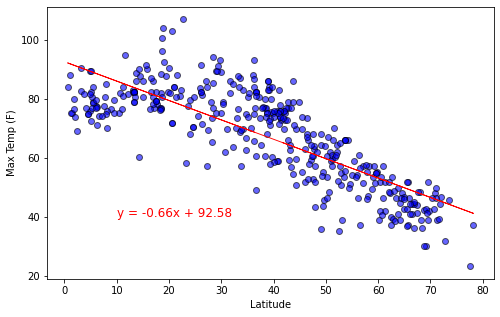

In [80]:
slope, intercept, rvalue, pvalue, stderr = linregress(north_hem["Lat"], north_hem["Max Temp"])
regression_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (8,5))
plt.scatter(north_hem["Lat"], north_hem["Max Temp"], facecolor="blue", edgecolor="black", alpha=0.6)
plt.plot(north_hem["Lat"], regression_values, color="red", linewidth= .9)
plt.annotate(line_eq,(10,40), color='red', fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")


print(f"The r-value is {round(rvalue,4)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7209


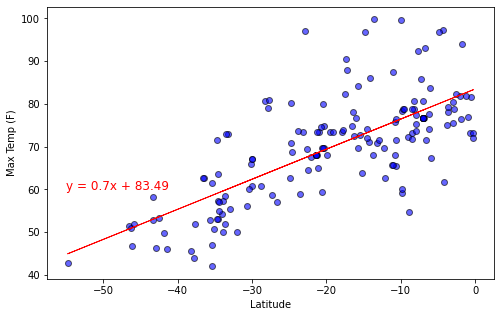

In [100]:
slope, intercept, rvalue, pvalue, stderr = linregress(south_hem["Lat"], south_hem["Max Temp"])
regression_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (8,5))
plt.scatter(south_hem["Lat"], south_hem["Max Temp"], facecolor="blue", edgecolor="black", alpha=0.6)
plt.plot(south_hem["Lat"], regression_values, color="red", linewidth= .9)
plt.annotate(line_eq,(-55,60), color='red', fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")


print(f"The r-value is {round(rvalue,4)}")

After further looking into the relationship between the proximity of a city to the equator and it's max temperature, we found the is a direct correlation and the closer a city to the equator a city is, the higher it's max temperature is. Interesting to note that in the northen hemisphere this is a inverse correlation (the higher the latitude the further from the equator, hence the lower the max temp is). In the southern hemisphere the relationship is direct. since the latitude goes from -90 to 0.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.0571


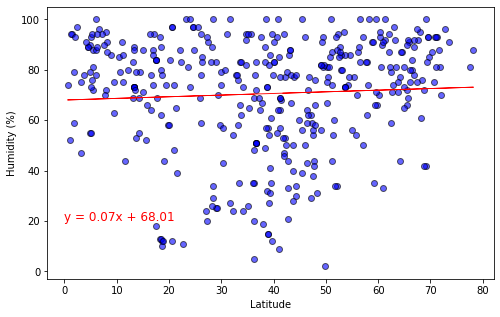

In [84]:
slope, intercept, rvalue, pvalue, stderr = linregress(north_hem["Lat"], north_hem["Humidity"])
regression_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (8,5))
plt.scatter(north_hem["Lat"], north_hem["Humidity"], facecolor="blue", edgecolor="black", alpha=0.6)
plt.plot(north_hem["Lat"], regression_values, color="red", linewidth= .9)
plt.annotate(line_eq,(0,20), color='red', fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


print(f"The r-value is {round(rvalue,4)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.0435


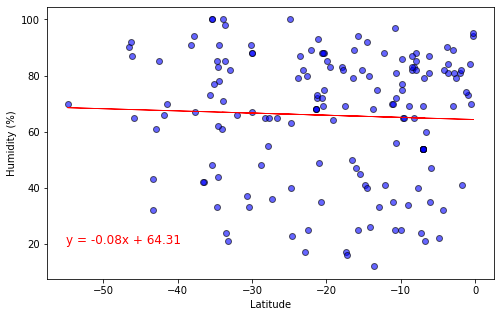

In [101]:
slope, intercept, rvalue, pvalue, stderr = linregress(south_hem["Lat"], south_hem["Humidity"])
regression_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (8,5))
plt.scatter(south_hem["Lat"], south_hem["Humidity"], facecolor="blue", edgecolor="black", alpha=0.6)
plt.plot(south_hem["Lat"], regression_values, color="red", linewidth= .9)
plt.annotate(line_eq,(-55,20), color='red', fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


print(f"The r-value is {round(rvalue,4)}")

No correlation between the location of the city vs the equator and the humidity in that city

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.0602


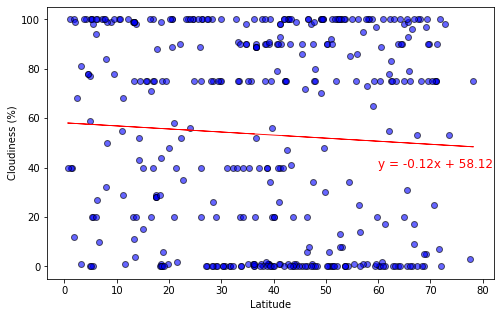

In [92]:
slope, intercept, rvalue, pvalue, stderr = linregress(north_hem["Lat"], north_hem["Cloudiness"])
regression_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (8,5))
plt.scatter(north_hem["Lat"], north_hem["Cloudiness"], facecolor="blue", edgecolor="black", alpha=0.6)
plt.plot(north_hem["Lat"], regression_values, color="red", linewidth= .9)
plt.annotate(line_eq,(60,40), color='red', fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


print(f"The r-value is {round(rvalue,4)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0963


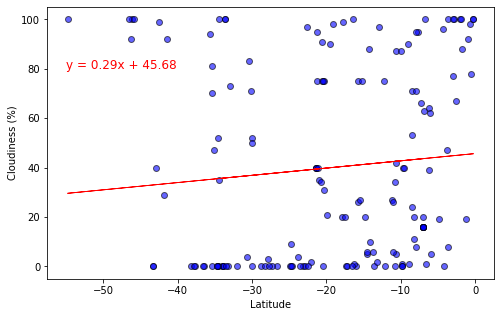

In [102]:
slope, intercept, rvalue, pvalue, stderr = linregress(south_hem["Lat"], south_hem["Cloudiness"])
regression_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (8,5))
plt.scatter(south_hem["Lat"], south_hem["Cloudiness"], facecolor="blue", edgecolor="black", alpha=0.6)
plt.plot(south_hem["Lat"], regression_values, color="red", linewidth= .9)
plt.annotate(line_eq,(-55,80), color='red', fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


print(f"The r-value is {round(rvalue,4)}")

No correlation between a city's location and how cloudy the city is

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.0532


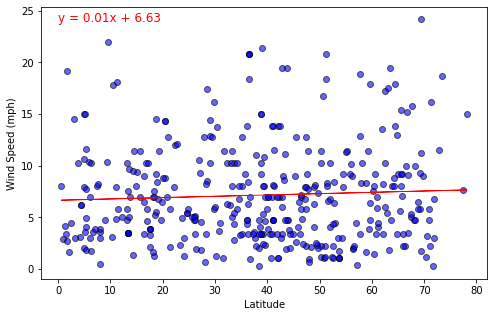

In [97]:
slope, intercept, rvalue, pvalue, stderr = linregress(north_hem["Lat"], north_hem["Wind Speed"])
regression_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (8,5))
plt.scatter(north_hem["Lat"], north_hem["Wind Speed"], facecolor="blue", edgecolor="black", alpha=0.6)
plt.plot(north_hem["Lat"], regression_values, color="red", linewidth= .9)
plt.annotate(line_eq,(0,24), color='red', fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is {round(rvalue,4)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.2834


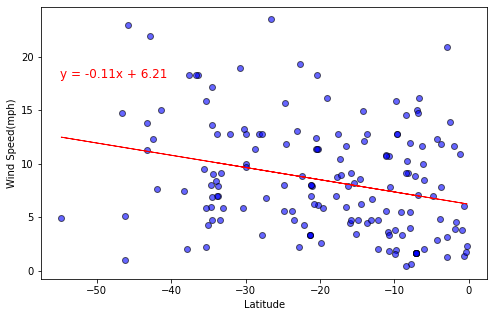

In [99]:
slope, intercept, rvalue, pvalue, stderr = linregress(south_hem["Lat"], south_hem["Wind Speed"])
regression_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (8,5))
plt.scatter(south_hem["Lat"], south_hem["Wind Speed"], facecolor="blue", edgecolor="black", alpha=0.6)
plt.plot(south_hem["Lat"], regression_values, color="red", linewidth= .9)
plt.annotate(line_eq,(-55,18), color='red', fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")


print(f"The r-value is {round(rvalue,4)}")

In [ ]:
No correlation between how windy a city is and it's proximity to the equator